In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path

In [4]:
disasterPath = os.path.join("..", "disaster-data", "disaster_data.xlsx")
disasterData = pd.read_excel(disasterPath, sheet_name="EM-DAT Data")

hdiPath = os.path.join("..", "disaster-data", "hdi_data.csv")
hdiData = pd.read_csv(hdiPath)

In [5]:
# Clean disaster dataframe to only include type, location, date, and human toll
disasterDataClean = disasterData[["Disaster Group", "Disaster Subgroup", "Disaster Type", "Disaster Subtype", 
    "ISO", "Country", "Subregion", "Region", "Start Year", "Start Month", "Start Day", 
    "Total Deaths", "Total Affected"]]
disasterDataClean

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0
2,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,2000,1.0,NaN,21.0,1200000.0
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,IND,India,Southern Asia,Asia,2023,11.0,26.0,24.0,25.0
9809,Natural,Hydrological,Flood,Flood (General),AUS,Australia,Australia and New Zealand,Oceania,2023,11.0,27.0,NaN,390.0
9810,Natural,Climatological,Drought,Drought,HND,Honduras,Latin America and the Caribbean,Americas,2023,1.0,NaN,NaN,10300.0
9811,Natural,Climatological,Drought,Drought,ESP,Spain,Southern Europe,Europe,2023,NaN,NaN,NaN,NaN


In [6]:
# Create multi index to sort hdi data
yearList = [x for x in range(2000, 2022)]
iterables = [hdiData['iso3'], yearList]
hdiFrame = pd.MultiIndex.from_product(iterables, names=["ISO", "Start Year"])
hdiFrame

MultiIndex([(      'AFG', 2000),
            (      'AFG', 2001),
            (      'AFG', 2002),
            (      'AFG', 2003),
            (      'AFG', 2004),
            (      'AFG', 2005),
            (      'AFG', 2006),
            (      'AFG', 2007),
            (      'AFG', 2008),
            (      'AFG', 2009),
            ...
            ('ZZK.WORLD', 2012),
            ('ZZK.WORLD', 2013),
            ('ZZK.WORLD', 2014),
            ('ZZK.WORLD', 2015),
            ('ZZK.WORLD', 2016),
            ('ZZK.WORLD', 2017),
            ('ZZK.WORLD', 2018),
            ('ZZK.WORLD', 2019),
            ('ZZK.WORLD', 2020),
            ('ZZK.WORLD', 2021)],
           names=['ISO', 'Start Year'], length=4532)

In [7]:
# Create dataframe from multi index
hdiCleanFrame = pd.DataFrame(index=hdiFrame, columns=["hdi", "le", "gnipc"])
hdiCleanFrame

hdi   le gnipc
ISO       Start Year                
AFG       2000        NaN  NaN   NaN
          2001        NaN  NaN   NaN
          2002        NaN  NaN   NaN
          2003        NaN  NaN   NaN
          2004        NaN  NaN   NaN
...                   ...  ...   ...
ZZK.WORLD 2017        NaN  NaN   NaN
          2018        NaN  NaN   NaN
          2019        NaN  NaN   NaN
          2020        NaN  NaN   NaN
          2021        NaN  NaN   NaN

[4532 rows x 3 columns]

In [8]:
# Filter hdi data only for 2000 and onward to match range of disaster data
hdiYear = hdiData.filter(regex="[0-2][0-9]$")

# Filter hdi data by index
filterHDI = hdiYear.filter(regex="^hdi.[0-9]", axis=1)
filterLE = hdiYear.filter(regex="^le.[0-9]", axis=1)
filterGNIPC = hdiYear.filter(regex="^gnipc", axis=1)

# Make list of relevant indexes
countryList = list(hdiData["iso3"])
dataList = ["hdi", "le", "gnipc"]

# Creates a list of lists for each countries index measurements from 2000-2021
hdiList = [filterHDI.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterHDI))]
leList = [filterLE.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterLE))]
gnipcList = [filterGNIPC.iloc[x, :].values.flatten().tolist() for x in range(0, len(filterGNIPC))]

# Store all lists together to loop through
totalList = [hdiList, leList, gnipcList]


In [9]:
# Loop through each index list, and insert data for each country. 

# Since each data list is formatted by country and then from 2000-2021,
# Insert data by looping through the country list and using .loc

j = 0

for bigList in totalList:
    i = 0
    for smallList in bigList:
        hdiCleanFrame.loc[countryList[i], dataList[j]] = smallList
        i += 1
    j += 1

hdiCleanFrame.reset_index()

,ISO,Start Year,hdi,le,gnipc
0,AFG,2000,0.335,55.2978,984.997434
1,AFG,2001,0.337,55.7981,894.024589
2,AFG,2002,0.362,56.4538,1267.628852
3,AFG,2003,0.376,57.3445,1401.324413
4,AFG,2004,0.392,57.9436,1384.695729
...,...,...,...,...,...
4527,ZZK.WORLD,2017,0.733,72.568952,16022.41006
4528,ZZK.WORLD,2018,0.736,72.816114,16372.22453
4529,ZZK.WORLD,2019,0.739,73.012099,16652.53351
4530,ZZK.WORLD,2020,0.735,72.257297,15963.88897


In [10]:
# Merge hdi data to the disaster data frame so each disaster includes hdi data for it's country
disasterHDIData = pd.merge(disasterDataClean, hdiCleanFrame, how="left", on=["ISO", "Start Year"])
disasterHDIData

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0,0.371,56.9027,1822.11807
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0,0.424,58.3185,3723.241744
2,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,2000,1.0,NaN,21.0,1200000.0,NaN,50.6604,1069.705689
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,IND,India,Southern Asia,Asia,2023,11.0,26.0,24.0,25.0,NaN,NaN,NaN
9809,Natural,Hydrological,Flood,Flood (General),AUS,Australia,Australia and New Zealand,Oceania,2023,11.0,27.0,NaN,390.0,NaN,NaN,NaN
9810,Natural,Climatological,Drought,Drought,HND,Honduras,Latin America and the Caribbean,Americas,2023,1.0,NaN,NaN,10300.0,NaN,NaN,NaN
9811,Natural,Climatological,Drought,Drought,ESP,Spain,Southern Europe,Europe,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:

hdiBins = [0, 0.550, 0.699, 0.799, 1]
hdiLabels = ["<0.550", "0.550-0.699", "0.699-0.799", "0.799<"]


In [12]:
disasterHDIData["hdi bins"] = pd.cut(disasterHDIData["hdi"], hdiBins, labels=hdiLabels, include_lowest=True)
disasterHDIData

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc,hdi bins
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0,0.371,56.9027,1822.11807,<0.550
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0,0.424,58.3185,3723.241744,<0.550
2,Natural,Climatological,Drought,Drought,SOM,Somalia,Sub-Saharan Africa,Africa,2000,1.0,NaN,21.0,1200000.0,NaN,50.6604,1069.705689,NaN
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857,<0.550
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767,<0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,Natural,Meteorological,Storm,Severe weather,IND,India,Southern Asia,Asia,2023,11.0,26.0,24.0,25.0,NaN,NaN,NaN,NaN
9809,Natural,Hydrological,Flood,Flood (General),AUS,Australia,Australia and New Zealand,Oceania,2023,11.0,27.0,NaN,390.0,NaN,NaN,NaN,NaN
9810,Natural,Climatological,Drought,Drought,HND,Honduras,Latin America and the Caribbean,Americas,2023,1.0,NaN,NaN,10300.0,NaN,NaN,NaN,NaN
9811,Natural,Climatological,Drought,Drought,ESP,Spain,Southern Europe,Europe,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with no HDI data
disasterHDIClean = disasterHDIData.dropna(axis=0, subset=["hdi", "le", "gnipc"])
disasterHDIClean.reset_index(drop=True)
disasterHDIClean

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc,hdi bins
0,Natural,Climatological,Drought,Drought,DJI,Djibouti,Sub-Saharan Africa,Africa,2001,6.0,NaN,NaN,100000.0,0.371,56.9027,1822.11807,<0.550
1,Natural,Climatological,Drought,Drought,SDN,Sudan,Northern Africa,Africa,2000,1.0,NaN,NaN,2000000.0,0.424,58.3185,3723.241744,<0.550
3,Natural,Hydrological,Flood,Riverine flood,AGO,Angola,Sub-Saharan Africa,Africa,2000,1.0,8.0,31.0,70000.0,0.375,46.0236,3690.604857,<0.550
4,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,2000,1.0,NaN,49.0,NaN,0.485,65.7791,2002.466767,<0.550
5,Natural,Geophysical,Volcanic activity,Ash fall,GTM,Guatemala,Latin America and the Caribbean,Americas,2000,1.0,16.0,NaN,800.0,0.55,67.4459,6429.056878,<0.550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9064,Natural,Climatological,Drought,Drought,SSD,South Sudan,Sub-Saharan Africa,Africa,2021,NaN,NaN,NaN,7723670.0,0.385,54.9752,767.787,<0.550
9065,Natural,Climatological,Drought,Drought,ZWE,Zimbabwe,Sub-Saharan Africa,Africa,2021,8.0,NaN,NaN,167500.0,0.593,59.2531,3809.887158,0.550-0.699
9066,Natural,Climatological,Drought,Drought,ZMB,Zambia,Sub-Saharan Africa,Africa,2021,7.0,NaN,NaN,1580000.0,0.565,61.2234,3217.767739,0.550-0.699
9067,Natural,Climatological,Drought,Drought,USA,United States of America,Northern America,Americas,2021,1.0,1.0,NaN,NaN,0.921,77.1982,64765.21509,0.799<


In [14]:
hdiDeath = disasterHDIClean.groupby("hdi bins")["Total Deaths"]
hdiAffected = disasterHDIClean.groupby("hdi bins")["Total Affected"]

C:\Users\Ashley\AppData\Local\Temp\ipykernel_9172\2683465002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdiDeath = disasterHDIClean.groupby("hdi bins")["Total Deaths"]
C:\Users\Ashley\AppData\Local\Temp\ipykernel_9172\2683465002.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdiAffected = disasterHDIClean.groupby("hdi bins")["Total Affected"]


### Analysis


In [15]:
# 
xAxis = np.arange(len(hdiLabels))
ticks = [value for value in xAxis]
hdiDeath.describe()


,count,mean,std,min,25%,50%,75%,max
hdi bins,,,,,,,,
<0.550,1875.0,347.342400,6316.234046,1.0,9.0,20.0,53.0,222570.0
0.550-0.699,1801.0,240.711827,4510.069094,1.0,6.0,16.0,41.0,165708.0
0.699-0.799,1284.0,98.598131,1729.731308,1.0,3.0,10.0,23.0,55736.0
0.799<,1284.0,102.901869,1090.933493,1.0,2.0,5.0,13.0,20089.0


Text(0, 0.5, 'Total Deaths')

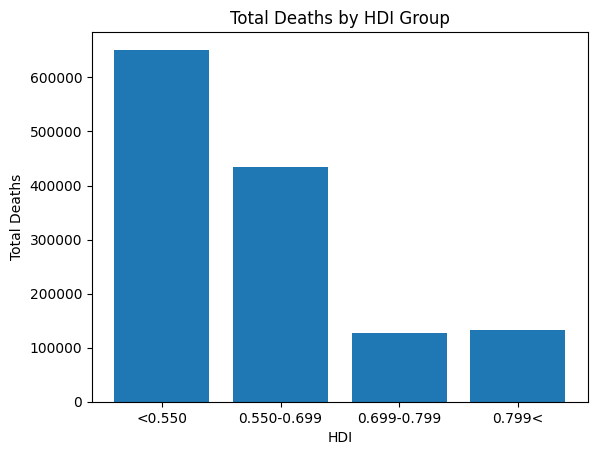

In [16]:

plt.bar(xAxis, hdiDeath.sum())
plt.xticks(ticks, hdiLabels)
plt.title("Total Deaths by HDI Group")
plt.xlabel("HDI")
plt.ylabel("Total Deaths")

Text(0, 0.5, 'Total Disasters')

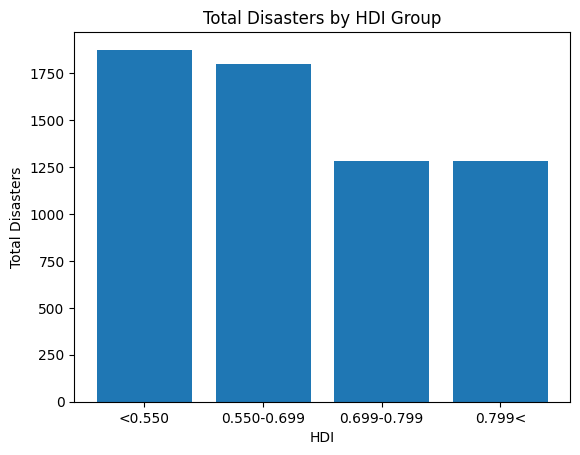

In [17]:
plt.bar(xAxis, hdiDeath.count())
plt.xticks(ticks, hdiLabels)
plt.title("Total Disasters by HDI Group")
plt.xlabel("HDI")
plt.ylabel("Total Disasters")

Text(0, 0.5, 'Total Affected')

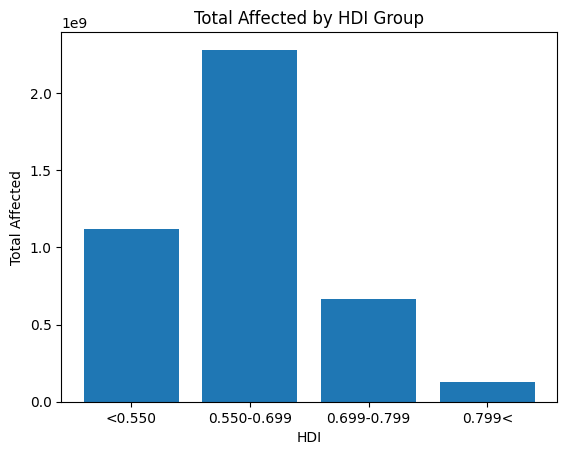

In [18]:
plt.bar(xAxis, hdiAffected.sum())
plt.xticks(ticks, hdiLabels)
plt.title("Total Affected by HDI Group")
plt.xlabel("HDI")
plt.ylabel("Total Affected")

Text(0, 0.5, 'Median Deaths')

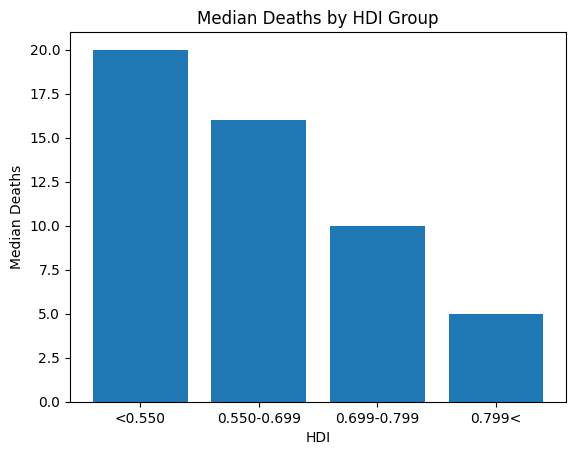

In [19]:

plt.bar(xAxis, hdiDeath.median())
plt.xticks(ticks, hdiLabels)
plt.title("Median Deaths by HDI Group")
plt.xlabel("HDI")
plt.ylabel("Median Deaths")

Text(0, 0.5, 'Total Deaths')

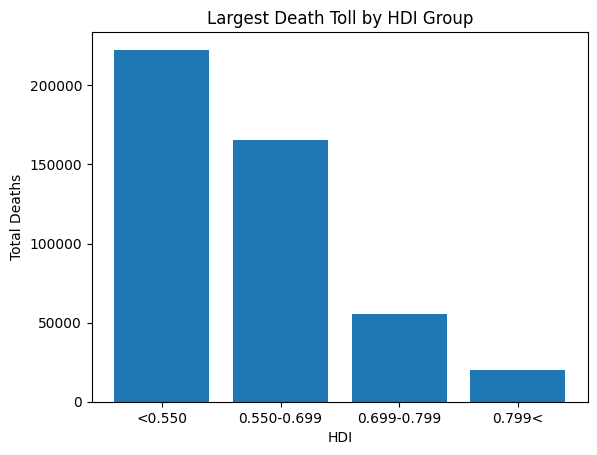

In [20]:

plt.bar(xAxis, hdiDeath.max())
plt.xticks(ticks, hdiLabels)
plt.title("Largest Death Toll by HDI Group")
plt.xlabel("HDI")
plt.ylabel("Total Deaths")

In [21]:
worstDeaths = disasterHDIClean.sort_values(by="Total Deaths", ascending=False).head(10)
worstDeaths

,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Start Year,Start Month,Start Day,Total Deaths,Total Affected,hdi,le,gnipc,hdi bins
4469,Natural,Geophysical,Earthquake,Ground movement,HTI,Haiti,Latin America and the Caribbean,Americas,2010,1.0,12.0,222570.0,3700000.0,0.433,46.0185,2905.829348,<0.550
2241,Natural,Geophysical,Earthquake,Tsunami,IDN,Indonesia,South-eastern Asia,Asia,2004,12.0,26.0,165708.0,532898.0,0.619,65.7503,6132.296838,0.550-0.699
3767,Natural,Meteorological,Storm,Tropical cyclone,MMR,Myanmar,South-eastern Asia,Asia,2008,5.0,2.0,138366.0,2420000.0,0.465,56.5056,2298.024551,<0.550
3771,Natural,Geophysical,Earthquake,Ground movement,CHN,China,Eastern Asia,Asia,2008,5.0,12.0,87476.0,45976596.0,0.672,74.8719,7457.824155,0.550-0.699
2620,Natural,Geophysical,Earthquake,Ground movement,PAK,Pakistan,Southern Asia,Asia,2005,10.0,8.0,73338.0,5128309.0,0.484,62.4657,3631.120554,<0.550
4679,Natural,Meteorological,Extreme temperature,Heat wave,RUS,Russian Federation,Eastern Europe,Europe,2010,6.0,NaN,55736.0,NaN,0.796,69.386,23185.28566,0.699-0.799
2244,Natural,Geophysical,Earthquake,Tsunami,LKA,Sri Lanka,Southern Asia,Asia,2004,12.0,26.0,35399.0,1019306.0,0.683,67.0914,6534.764141,0.550-0.699
1810,Natural,Geophysical,Earthquake,Ground movement,IRN,Iran (Islamic Republic of),Southern Asia,Asia,2003,12.0,26.0,26796.0,267628.0,0.704,69.8231,11429.75163,0.699-0.799
1697,Natural,Meteorological,Extreme temperature,Heat wave,ITA,Italy,Southern Europe,Europe,2003,7.0,16.0,20089.0,NaN,0.858,80.1929,43882.52323,0.799<
547,Natural,Geophysical,Earthquake,Ground movement,IND,India,Southern Asia,Asia,2001,1.0,26.0,20005.0,6321812.0,0.496,63.0913,2634.934649,<0.550


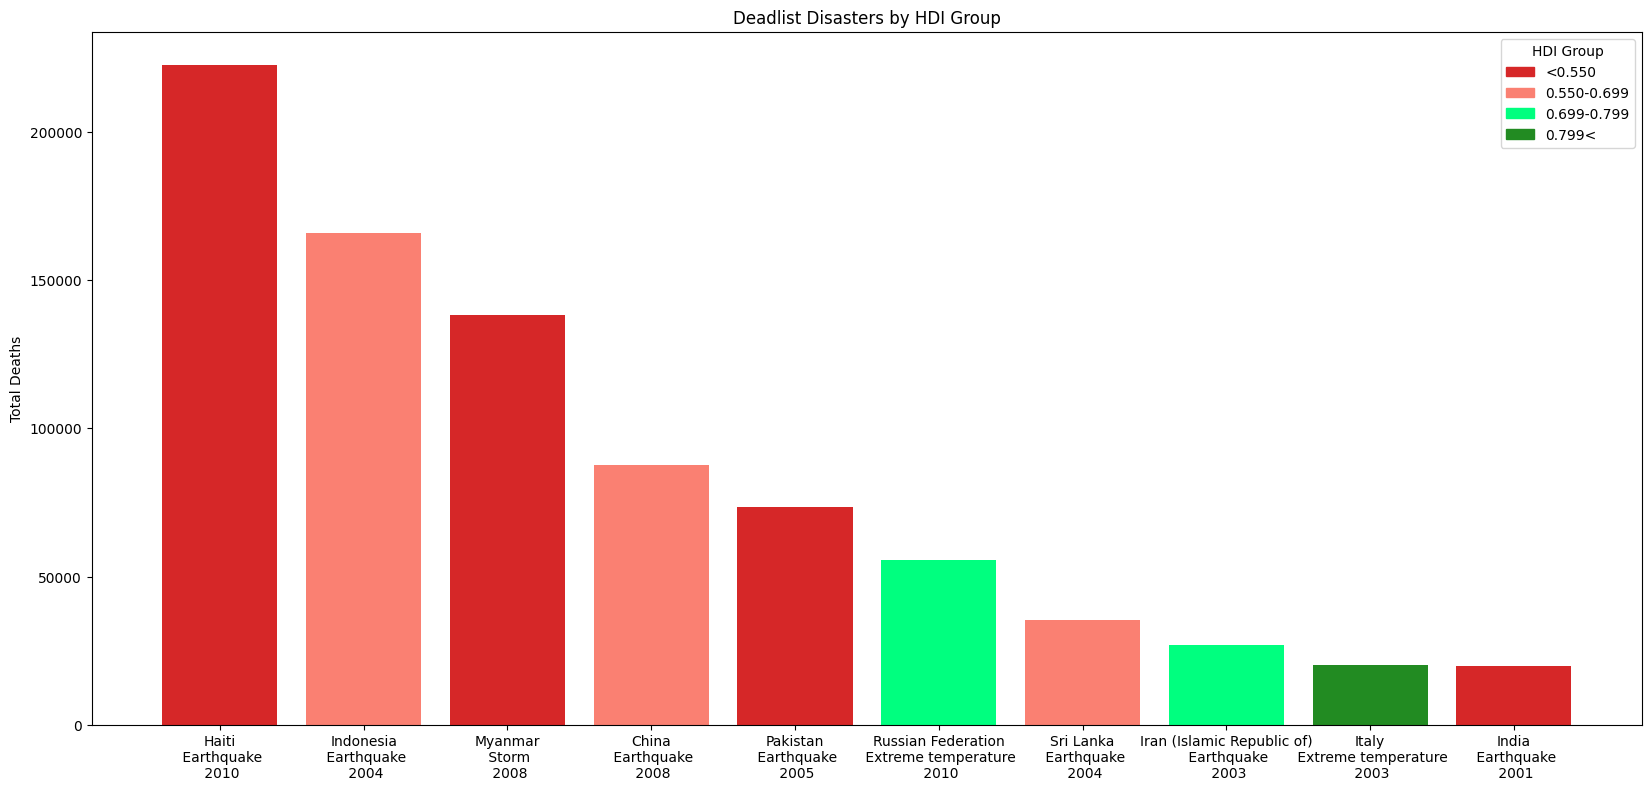

In [22]:
worstLabels = [f'{x}\n {y}\n {z}' for x, y, z in zip(worstDeaths["Country"], worstDeaths["Disaster Type"], worstDeaths["Start Year"])]
worstXAxis = np.arange(len(worstDeaths))
worstTicks = [value for value in worstXAxis]
barColors = {"<0.550": "tab:red", "0.550-0.699": "salmon",
             "0.699-0.799": "springgreen", "0.799<": "forestgreen"}

plt.figure(figsize=(20, 9))
plt.bar(worstXAxis, worstDeaths["Total Deaths"], label=worstDeaths["hdi bins"],
        color=[barColors[i] for i in worstDeaths["hdi bins"]])
handles = [plt.Rectangle((0,0),1,1, color=barColors[l]) for l in hdiLabels]
plt.title("Deadlist Disasters by HDI Group")
plt.ylabel("Total Deaths")
plt.legend(handles, hdiLabels, title="HDI Group")
plt.xticks(worstTicks, worstLabels)
plt.show()
